In [25]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

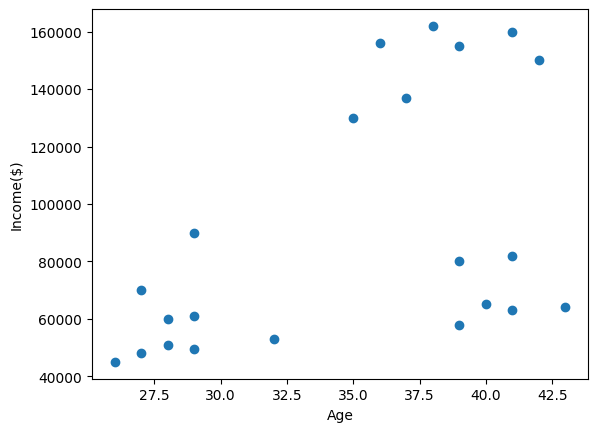

In [26]:
plt.scatter(df['Age'],df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [27]:
km= KMeans(n_clusters=3)
km



KMeans(n_clusters=3)

In [33]:
#fit and predict
y_predicted = km.fit_predict(df[['Age','Income($)']])
print(y_predicted)


df['cluster']=y_predicted
df.head()

[1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 2]


,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


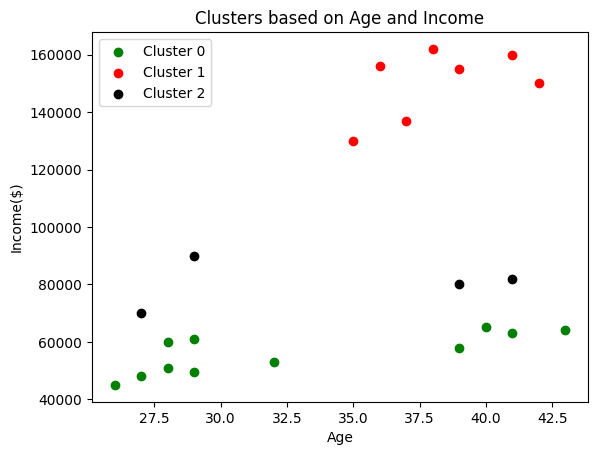

In [29]:
# Filter the data based on clusters
a = df[df['cluster'] == 0]
b = df[df['cluster'] == 1]
c = df[df['cluster'] == 2]

# Plot each cluster with appropriate labels and colors
plt.scatter(a['Age'], a['Income($)'], color='green', label='Cluster 0')
plt.scatter(b['Age'], b['Income($)'], color='red', label='Cluster 1')
plt.scatter(c['Age'], c['Income($)'], color='black', label='Cluster 2')

# Add labels and a legend
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()  # Add the legend with cluster labels
plt.title('Clusters based on Age and Income')
plt.show()

#the values are not scaled properly thats why x and y axis are little mixed to avoid that scaled


In [30]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the 'Income($)' column
scaler.fit(df[['Income($)']])

# Transform and update the 'Income($)' column in the DataFrame
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [32]:
km = KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [34]:
df['cluster']=y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [37]:
#k=3 and find centroids points(x,y)

km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

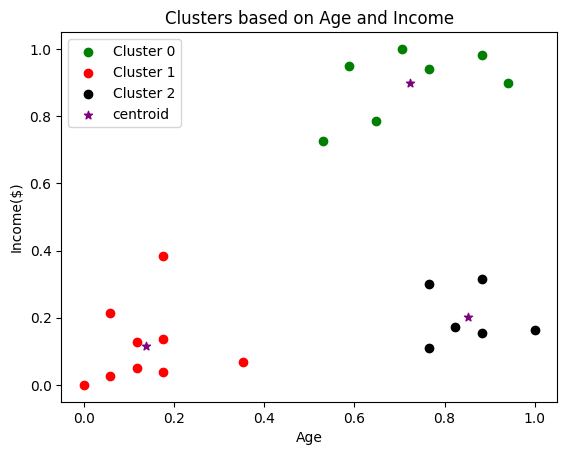

In [39]:
# Filter the data based on clusters
a = df[df['cluster'] == 0]
b = df[df['cluster'] == 1]
c = df[df['cluster'] == 2]

# Plot each cluster with appropriate labels and colors
plt.scatter(a['Age'], a['Income($)'], color='green', label='Cluster 0')
plt.scatter(b['Age'], b['Income($)'], color='red', label='Cluster 1')
plt.scatter(c['Age'], c['Income($)'], color='black', label='Cluster 2')

# Add labels and a legend
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()  # Add the legend with cluster labels
plt.title('Clusters based on Age and Income')

#print with centroids points(x as 0, y as 1)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple', marker="*", label='centroid')

plt.legend()  # Add the legend with cluster labels
plt.show()




In [40]:
k_rng=range(1,10)
sse=[]

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)


sse


[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.34410273486467063,
 0.2541659841799582,
 0.20363666097000918,
 0.15270536286861378,
 0.10188787724979426]

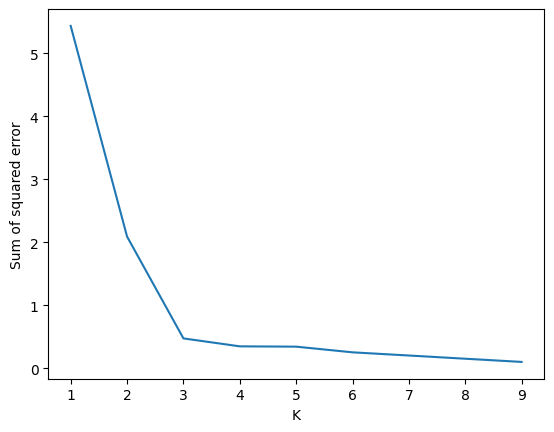

In [41]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)